# Advertising Sales Channel Prediction

# Problem Statement

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

# Importing requried Library

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df=pd.read_csv('Advertising Sales Channel Prediction.csv')

In [3]:
#Checking
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

This dataset has 200 rows that means 200 variable Data

5 Columns or attributes including Target attribute

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no null or missing values in the Dataset

In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

All The Columns have numerical value.

So we can say that This Problem is a Regression type of Problem.

### Statistical Summary

In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Our dataset seems to be normally distributed because mean and median values are nearly close to each other.

There could be some outliers present in newspaper column because there is a compartively high difference between 3rd quantile and max values.

Radio attribute has a minimum zero value in our dataset which could be part of further investigation in our dataset.

# Data Visualization

In [9]:
#Importing Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Data Distribution

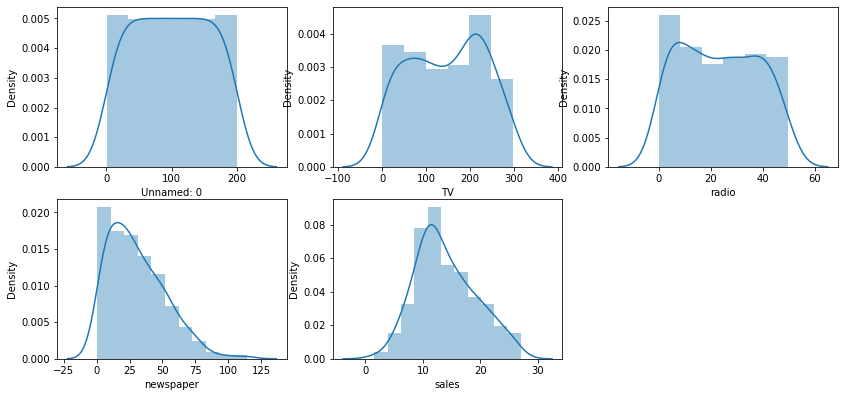

In [10]:
#Checking the Distribution of Data

plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=5:
        plt.subplot(3,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

It shows that our dataset is approimately bell shaped in distribution means normally distributed.

Newspaper attribute is a little right skewed.

Target attribute is Normally distributed.

<AxesSubplot:>

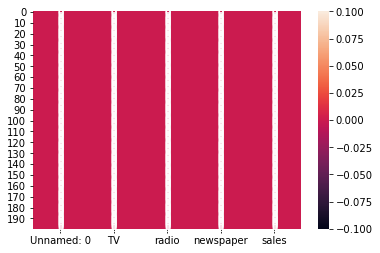

In [11]:
#Plotting Null Values
sns.heatmap(df.isnull(),annot=True)

No Null values are present in the Dataset

### Checking Correlation

<AxesSubplot:title={'center':'Correlation Graph'}>

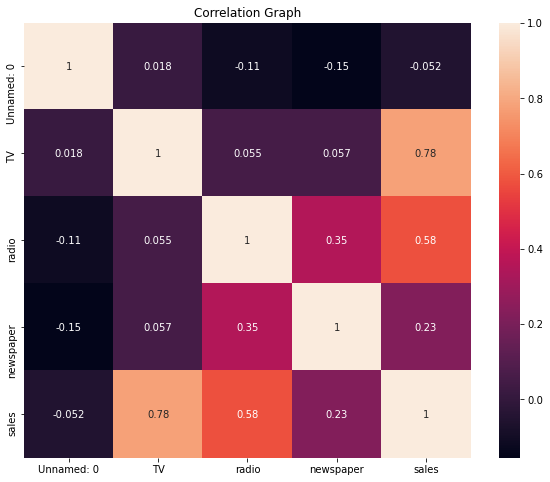

In [12]:
plt.figure(figsize=(10,8))
plt.title('Correlation Graph')
sns.heatmap(df.corr(),annot=True)

In [13]:
df.corr()['sales'].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

Unnamed:0 have least and negative correlation with our target attribute.

TV and radio has a strong and positive correlation with targer attribute.

### Bivariate Analysis

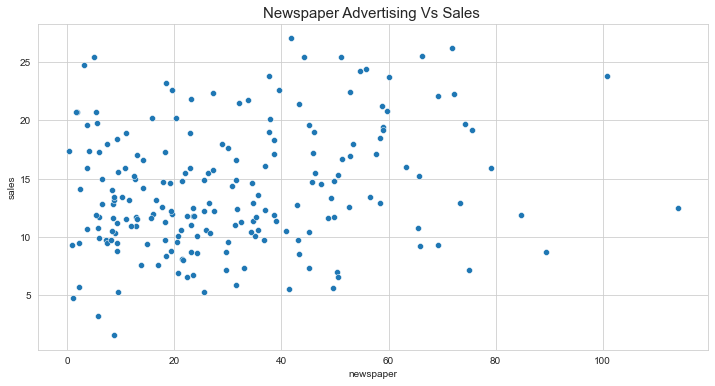

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.title('Newspaper Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['newspaper'],df['sales'],data=df)
plt.show()

We can see that there is a moderate realtionship with sales.
Datapoints are scattered we can't conclude from this plot
Some points are widly scattered.

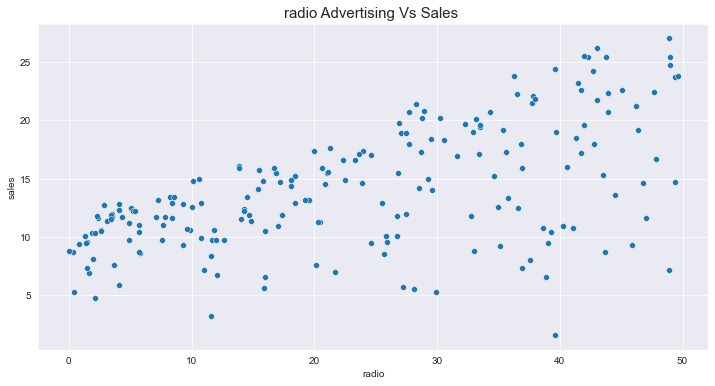

In [15]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('radio Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['radio'],df['sales'],data=df)
plt.show()

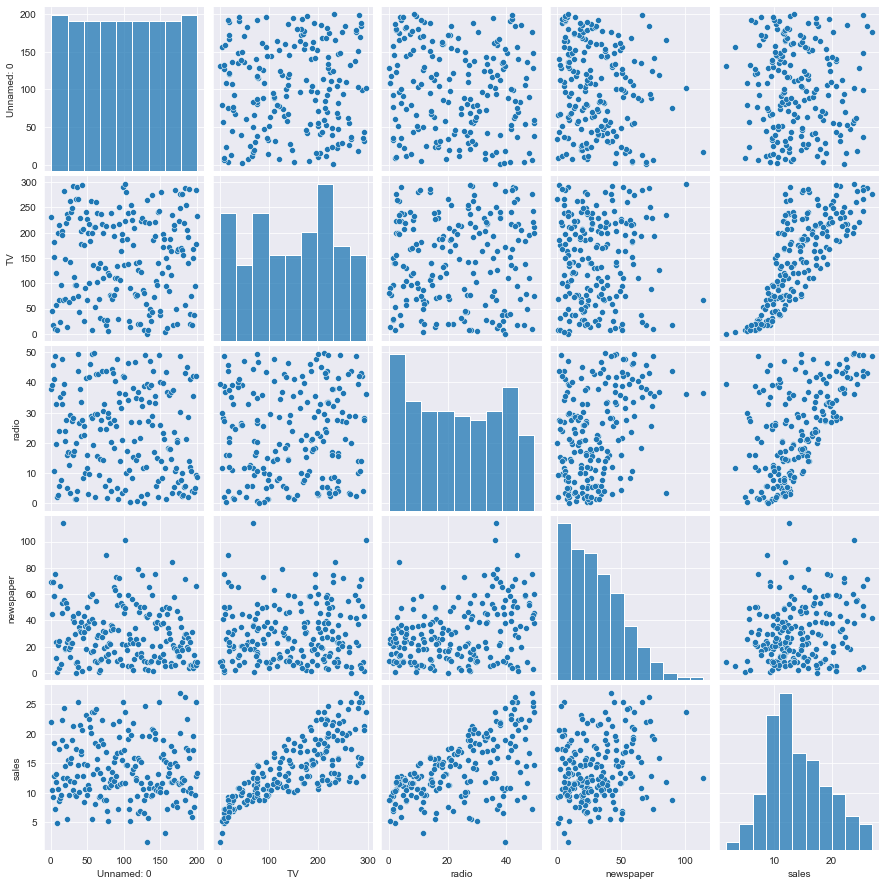

In [16]:
#We can observe all the attribute relation together.
sns.pairplot(df)

### Checking Outliers

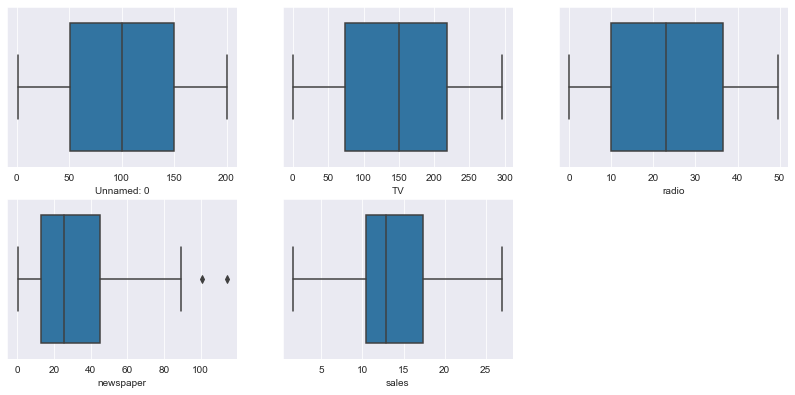

In [17]:
plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=5:
        plt.subplot(3,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

There are no outliers present in Tv, Radio, Sales Column

Some Outliers present in Newspaper.Bt the outliers are close to whiskers so don't have to remove them

### Checking Skewness

In [18]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

Any value greater than .5 or -.5 called outlier.We can see that there is Skewness present in Newspaper Attribute

In [19]:
#removing outliers
df['newspaper']=np.sqrt(df['newspaper'])

In [20]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.062388
sales         0.407571
dtype: float64

So we see that Outliers are Removed

### Imput and Output Separation

In [21]:
x=df.drop(['Unnamed: 0','sales'],axis=1)

y=df['sales']

In [22]:
print(x.shape,'\n',y.shape)

(200, 3) 
 (200,)


Data Preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
#Data Scaling
sc=StandardScaler()
df_x=sc.fit_transform(x)
x=pd.DataFrame(df_x,columns=x.columns)

### Feature Importance

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x,y)

ExtraTreesRegressor()

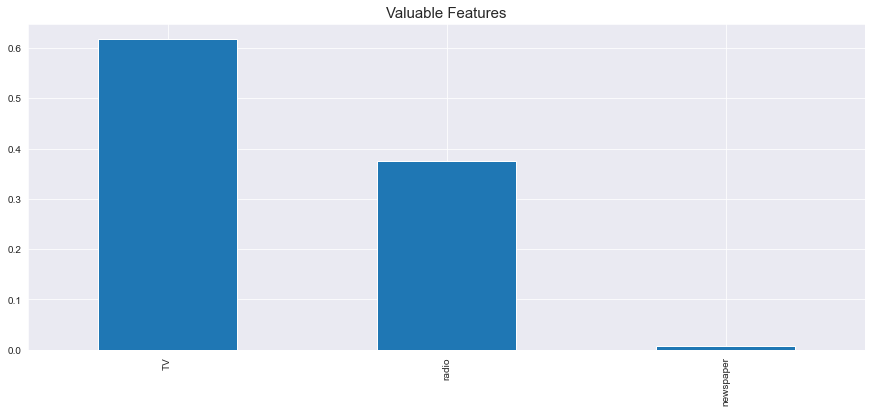

In [26]:
plt.figure(figsize=(15,6))
plt.title('Valuable Features',fontsize=15)
feat_importance=pd.Series(etr.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='bar')
plt.show()


As we also saw that Tv and Sales are Highly Correlated.
Here we aslo saw that Tv is the most important feature.

# Model buidling

In [27]:
#Importing Libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score

In [28]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('Training accuracy',clf.score(x_train,y_train))
    print('Test Accuracy',clf.score(x_test,y_test))
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    
    return final_r

In [29]:
# Linerar regression
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 92 is 0.9514095674628553
cross validation score 0.8873331295445761
Standard Deviation 0.03990673561316692
Training accuracy 0.8908046377834327
Test Accuracy 0.9189321197091166
MAE 1.1591806007349397
MSE 2.078102150164535
RMSE 1.4415623989840103


92

In [30]:
#Lasso Regression
lasso=Lasso()
maxr2_score(lasso,x,y)

max r2 score corresponding to 83 is 0.8616707145490253
cross validation score 0.8175135660884789
Standard Deviation 0.048169557907936526
Training accuracy 0.8207247509119464
Test Accuracy 0.8407357569037717
MAE 1.4975447804611437
MSE 4.082595533953025
RMSE 2.0205433759147624


83

In [31]:
# ridge regression
ridge=Ridge()
maxr2_score(ridge,x,y)

max r2 score corresponding to 92 is 0.9511069380271034
cross validation score 0.8873904144766908
Standard Deviation 0.04032441548753262
Training accuracy 0.8907728591577209
Test Accuracy 0.9186935191737393
MAE 1.1633667024856449
MSE 2.08421846014845
RMSE 1.4436822573365824


92

In [32]:
# elasticnet regression
elasticnet=ElasticNet()
maxr2_score(ridge,x,y)

max r2 score corresponding to 92 is 0.9511069380271034
cross validation score 0.8873904144766908
Standard Deviation 0.04032441548753262
Training accuracy 0.8907728591577209
Test Accuracy 0.9186935191737393
MAE 1.1633667024856449
MSE 2.08421846014845
RMSE 1.4436822573365824


92

In [33]:
#Decision Tree Regressor
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 75 is 0.9776224894425277
cross validation score 0.9544723874436402
Standard Deviation 0.011951906075839501
Training accuracy 1.0
Test Accuracy 0.9347061141214242
MAE 0.8774999999999998
MSE 1.6737499999999996
RMSE 1.293734903293561


75

In [34]:
#SUPPORT VECTOR
svm=SVR()
maxr2_score(svm,x,y)

max r2 score corresponding to 45 is 0.9773751285438941
cross validation score 0.9011953652320344
Standard Deviation 0.049914575176286016
Training accuracy 0.9249689951458994
Test Accuracy 0.9144889902006751
MAE 0.8609318419908025
MSE 2.191997776296875
RMSE 1.480539690888723


45

In [35]:
#Random Forest
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 47 is 0.9903514730505248
cross validation score 0.9749249389246941
Standard Deviation 0.007756348759793741
Training accuracy 0.9968712957012587
Test Accuracy 0.9861536566526617
MAE 0.4505000000000021
MSE 0.35493855000000274
RMSE 0.5957671944644173


47

In [36]:
# Gardient Boost Regressor
gb=GradientBoostingRegressor()
maxr2_score(gb,x,y)

max r2 score corresponding to 69 is 0.9907224277487077
cross validation score 0.9777394988230732
Standard Deviation 0.009370654840231854
Training accuracy 0.9985494385598839
Test Accuracy 0.9831158495559413
MAE 0.4766955628672419
MSE 0.43281000089804555
RMSE 0.6578829689983208


69

In [37]:
Best_model=best_model=pd.DataFrame({'Model':['LinearRegression','Lasso','Ridge','DecisionTreeRegressor','SVM','RandomForestRegressor','GradientBoostingRegressor'],
                         'R_2 score':[95.15,86.16,95.12,97.97,97.63,98.90,99.05],
                         'Cross_validation':[88.74,81.75,88.74,94.72,90.43,97.59,97.75]})
best_model

,Model,R_2 score,Cross_validation
0,LinearRegression,95.15,88.74
1,Lasso,86.16,81.75
2,Ridge,95.12,88.74
3,DecisionTreeRegressor,97.97,94.72
4,SVM,97.63,90.43
5,RandomForestRegressor,98.90,97.59
6,GradientBoostingRegressor,99.05,97.75


From above table it is clear that Random Forest Regressor if our best model because the difference between R_2 score and Cross validation score is minimum which shows that our Model is not overfit and best among all.

# Hyperparameter Tuning for Random Forest Regressor

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'bootstrap': True, 'max_depth': 50, 'max_features': 3, 'n_estimators': 50}

Error
 Mean Absolute Error (MAE) : 0.508729999999999
Mean Squared Error (MSE) : 0.4211756368888867
Root Mean Squared Error : 0.6489804595585962
R_2 score: 0.9853742838024895


<AxesSubplot:ylabel='sales'>

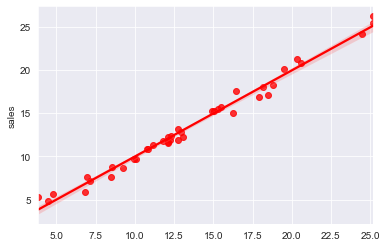

In [39]:
forest=RandomForestRegressor(bootstrap=True,max_depth=10,max_features=3,n_estimators=50)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print('Error')
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test))
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test)))
print('R_2 score:',r2_score(pred,y_test))
## best fit line
sns.regplot(pred,y_test,color='r')

We can see that with Hyperparameter tuning our R_2 score is 98.57 which is improved hence we will save this as our best Model.

# Saving Model

In [40]:
import joblib
joblib.dump(forest,'advertiseforest.pkl')

['advertiseforest.pkl']